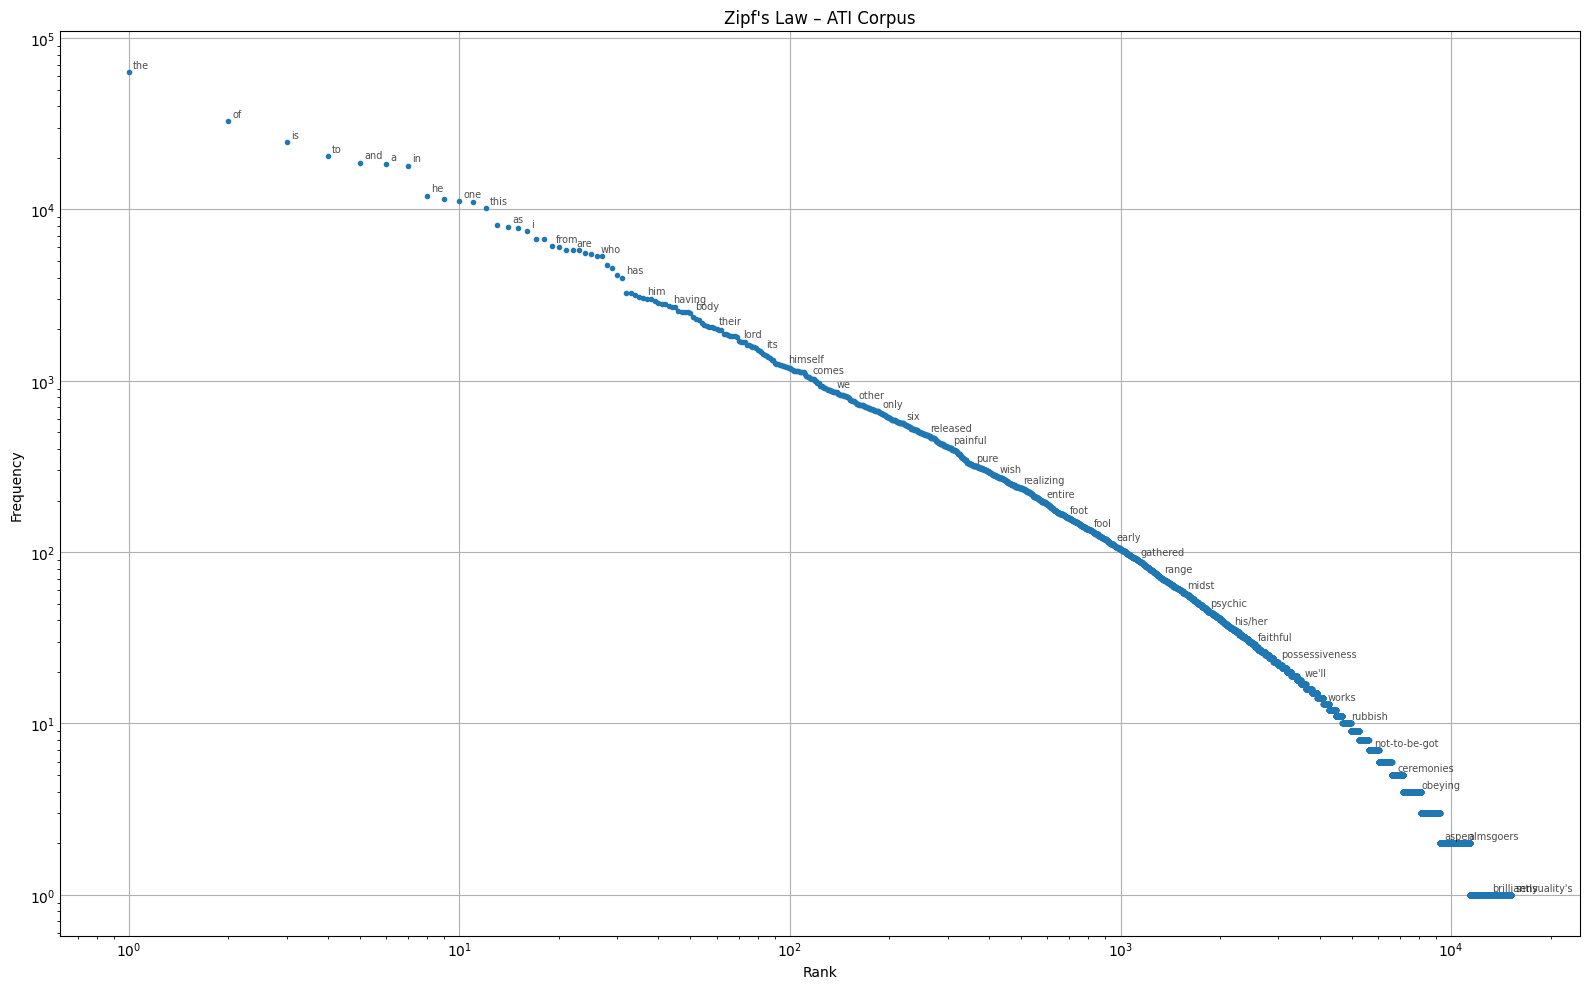

<Figure size 200x200 with 0 Axes>

In [1]:
from collections import Counter
import psycopg
from psycopg.rows import dict_row
import string
import re
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')


HAS_LETTER = re.compile(r'[^\W\d_]', re.UNICODE)

sql = ''' SELECT identifier, nikaya, book_number, vagga, text from ati_verses ORDER BY identifier'''

word_counter = Counter()

connection = psycopg.connect("dbname=tipitaka user=alee", row_factory=dict_row)
with connection.cursor() as cur:
    cur.execute(sql)
    for row in cur.fetchall():
        for word in row.get('text').split():
            word = word.strip(string.punctuation)
            word_counter[word.lower()] +=1


# print(word_counter.total())
#for w in word_counter.most_common()[:-5000:-1]:
# for c, w in enumerate(word_counter.most_common()):
#     print(c, w)

words_freqs = sorted(
    word_counter.items(),
    key=lambda x: x[1],
    reverse=True
)
# update to squash nums and punct-only
words_freqs = [
    (w, f) for w, f in words_freqs
    if HAS_LETTER.search(w)
]
# print(words_freqs[0:10])      
N = len(words_freqs)


ranks = range(1, len(words_freqs) + 1)
freqs = [freq for _, freq in words_freqs]
words = [word for word, _ in words_freqs]
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plt.loglog(ranks, freqs, marker='.', linestyle='none')
# for i in range(0, len(ranks), 100):
#     plt.annotate(
#         words[i],
#         (ranks[i], freqs[i]),
#         textcoords="offset points",
#         xytext=(3, 3),
#         fontsize=7,
#         alpha=0.7
#     )
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law – ATI Corpus")
label_idx = np.unique(np.round(np.geomspace(1, len(words_freqs), num=60)).astype(int)) - 1
for i in label_idx:
    plt.annotate(words[i], (ranks[i], freqs[i]),
                 textcoords="offset points", xytext=(3, 3),
                 fontsize=7, alpha=0.7)


plt.tight_layout()

plt.show()
plt.savefig("ati_zipf.svg")

In [2]:
import re
from collections import Counter
import numpy as np
import matplotlib
matplotlib.use("Agg")  # non-interactive backend: avoids plt.show() blocking
import matplotlib.pyplot as plt

HAS_LETTER = re.compile(r"[^\W\d_]", re.UNICODE)

# --- build your counter however you do it ---
# word_counter = Counter(all_words)

# Example: if you already have word_counter:
clean_counter = Counter()
for w, f in word_counter.items():
    if w and HAS_LETTER.search(w):
        clean_counter[w] += f

words_freqs = sorted(clean_counter.items(), key=lambda x: x[1], reverse=True)

# --- vectors ---
N = len(words_freqs)
ranks = np.arange(1, N + 1)
freqs = np.array([f for _, f in words_freqs])
words = [w for w, _ in words_freqs]

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 6))
ax.loglog(ranks, freqs, ".", linestyle="none")

ax.set_xlabel("Word rank (log)")
ax.set_ylabel("Word frequency (log)")
ax.set_title("Zipf's Law – ATI corpus")

# --- label selection: geometric spacing ---
# Tune NUM_LABELS down if you still hate it.
NUM_LABELS = 40
label_idx = np.unique(np.round(np.geomspace(1, N, num=NUM_LABELS)).astype(int)) - 1

for i in label_idx:
    ax.annotate(
        words[i],
        (ranks[i], freqs[i]),
        textcoords="offset points",
        xytext=(3, 3),
        fontsize=7,
        alpha=0.7,
    )

fig.tight_layout()
fig.savefig("ati_zipf.svg")
fig.savefig("ati_zipf.png", dpi=200)
print("wrote: ati_zipf.svg and ati_zipf.png")

wrote: ati_zipf.svg and ati_zipf.png


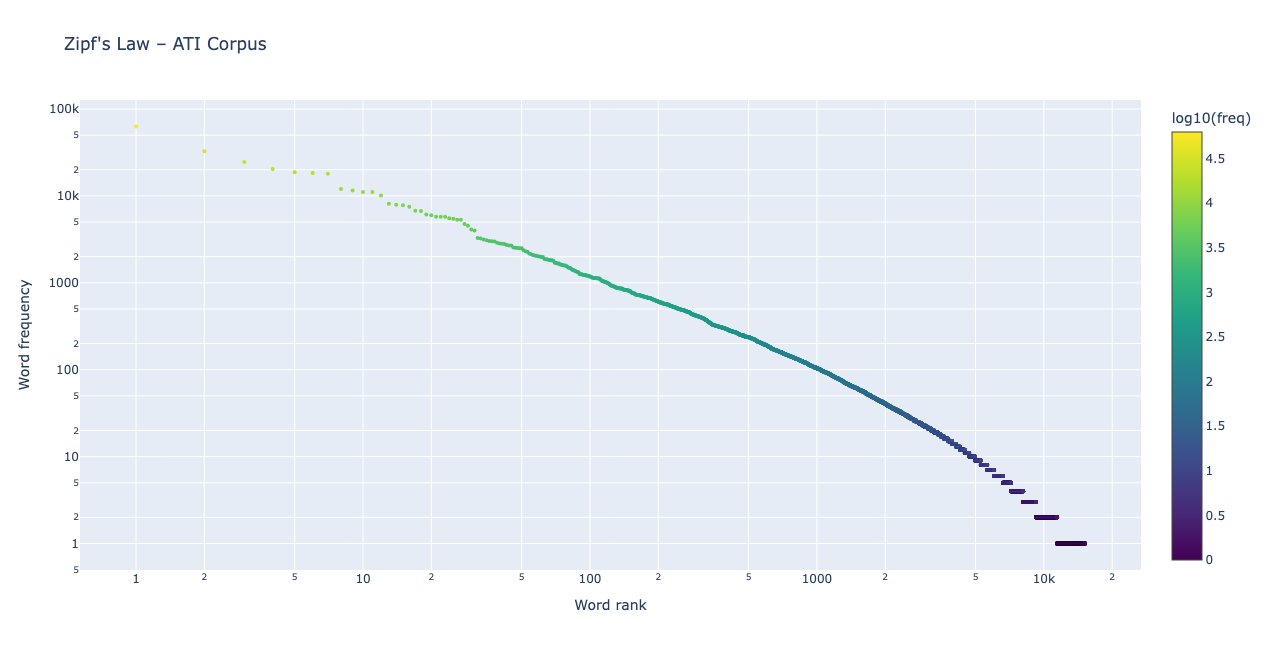

In [6]:
import re
from collections import Counter
import numpy as np
import plotly.graph_objects as go
import psycopg
from psycopg.rows import dict_row

sql = ''' SELECT identifier, nikaya, book_number, vagga, text from ati_verses ORDER BY identifier'''

word_counter = Counter()

connection = psycopg.connect("dbname=tipitaka user=alee", row_factory=dict_row)
with connection.cursor() as cur:
    cur.execute(sql)
    for row in cur.fetchall():
        for word in row.get('text').split():
            word = word.strip(string.punctuation)
            word_counter[word.lower()] +=1

words_freqs = sorted(clean_counter.items(), key=lambda x: x[1], reverse=True)

# --- vectors ---
N = len(words_freqs)
ranks = np.arange(1, N + 1)
freqs = np.array([f for _, f in words_freqs])
words = [w for w, _ in words_freqs]


fig = go.Figure()
colors = np.log10(freqs)

fig.add_trace(
    go.Scatter(
        x=ranks,
        y=freqs,
        mode="markers",
        marker=dict(
            size=4,
            color=colors,
            colorscale="Viridis",
            showscale=True,
            colorbar=dict(title="log10(freq)")
        ),
        text=words,
        hovertemplate="Rank %{x}<br>Freq %{y}<br>%{text}<extra></extra>"
    )
)

fig.update_layout(
    title="Zipf's Law – ATI Corpus",
    xaxis_title="Word rank",
    yaxis_title="Word frequency",
    xaxis_type="log",
    yaxis_type="log",
    width=1000,
    height=650
)


fig.show()
fig.write_html("ati_zipf_interactive.html")


In [7]:
import json

In [36]:
name_file = "./graph/entities/gold_people.jsonl"

def norm(w):
    return w.lower().strip(".,;:!?\"'()[]{}")
    
def tagged_words():
    entity_words = set()
    with open(name_file, 'r', encoding="utf-8") as f:
        records = [json.loads(line.strip()) for line in f]
    for r in records:
        entity_words.add(norm(r["name"]))
        for alias in r.get("aliases", []):
            entity_words.add(norm(alias))
    entity_word_list = [e.split(' ') for e in entity_words]

entity_words = tagged_words()

In [44]:
entity_words = tagged_words()

In [45]:
entity_words

{'ajita kesakambalin',
 'akkosa bharadvaja',
 'akkosaka',
 'akkosaka bharadvaja',
 'alara kalama',
 'alavaka',
 'alavika',
 'ambapali',
 'ananda',
 'anathapindika',
 'andhakavinda',
 'angulimala',
 'anigha',
 'anuradha',
 'anāthapiṇḍika',
 'arittha',
 'asibandhakaputta',
 'assalayana',
 'atthama',
 'awakened one',
 'baka brahma',
 'bharadvaja',
 'bhañña',
 'bhikkhuni khema',
 'bhikkhuni nandā',
 'blessed one',
 'brahma',
 'brahma sahampati',
 'brahmadatta',
 'buddha',
 'bāhiya',
 'candima',
 'citta',
 'dark one',
 'deva-king isana',
 'deva-king pajapati',
 'deva-king varuna',
 'devadatta',
 'dhanañjanin',
 'dhatarattha',
 'dona',
 'evil one',
 'exalted one',
 'fortunate one',
 'four great kings',
 'fully awakened one',
 'gavesin',
 'gotama,lord',
 'great brahma',
 'hatthaka of alavi',
 'hinga',
 'hingu',
 'inda',
 'indra',
 'janavasabha',
 'janesabha',
 'janussonin',
 'kakusanda',
 'kapadika',
 'kassapa',
 'khema',
 'king ajatasattu',
 'king ajatasattu vedehiputta',
 'king ajātasattu',

In [46]:
import re

TOKEN_RE = re.compile(r"[^\W\d_]+", re.UNICODE)

tokens = set()

for phrase in entity_words:
    words = TOKEN_RE.findall(phrase)
    for tok in words:
        tokens.add(tok)

In [47]:
tokens

{'ajatasattu',
 'ajita',
 'ajātasattu',
 'akkosa',
 'akkosaka',
 'alara',
 'alavaka',
 'alavi',
 'alavika',
 'ambapali',
 'ananda',
 'anathapindika',
 'andhakavinda',
 'angulimala',
 'anigha',
 'anuradha',
 'anāthapiṇḍika',
 'arahant',
 'arittha',
 'asibandhakaputta',
 'assalayana',
 'atthama',
 'awakened',
 'baka',
 'belatthaputta',
 'belaṭṭhaputta',
 'bharadvaja',
 'bhañña',
 'bhikkhuni',
 'bhāradvāja',
 'bimbisara',
 'bimbisāra',
 'blessed',
 'brahma',
 'brahmadatta',
 'buddha',
 'bāhiya',
 'candima',
 'citta',
 'dark',
 'deva',
 'devadatta',
 'dhanañjanin',
 'dhatarattha',
 'dona',
 'evil',
 'exalted',
 'father',
 'fisherman',
 'fortunate',
 'four',
 'fully',
 'gavesin',
 'gone',
 'gosala',
 'gotama',
 'gotta',
 'great',
 'guardsman',
 'hand',
 'hatthaka',
 'hinga',
 'hingu',
 'in',
 'inda',
 'indra',
 'isana',
 'janavasabha',
 'janesabha',
 'janussonin',
 'kaccana',
 'kaccayana',
 'kaccāyana',
 'kakusanda',
 'kalama',
 'kapadika',
 'kassapa',
 'kesakambalin',
 'khema',
 'king',
 '

In [48]:
text = "virupakkha ven. mahā kaccāyana"
text.strip(string.punctuation)
words = text.split()

In [49]:
words

['virupakkha', 'ven.', 'mahā', 'kaccāyana']

In [50]:
HAS_LETTER = re.compile(r"[^\W\d_]", re.UNICODE)

In [52]:
counter = Counter()
for w in words:
    if HAS_LETTER.search(w):
        counter[w] += 1

In [53]:
counter

Counter({'virupakkha': 1, 'ven.': 1, 'mahā': 1, 'kaccāyana': 1})

In [1]:
import spacy
lp = spacy.load("en_sutta_ner")

In [2]:
lp.meta.get("version")

'1.2.1'